In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, load_boston
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
%matplotlib inline

<p>Метод k-средних (англ. k-means) — наиболее популярный метод кластеризации.</p>
<p>Действие алгоритма таково, что он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров:</p>
<p><center>$$\large{V=\sum _{i=1}^{k}\sum _{x\in S_{i}}(x-\mu _{i})^{2}}$$</center></p>
- где $\large{k}$ — число кластеров, $\large{S_{i}}$ — полученные кластеры, $\large{i=1,2,\dots ,k}$, а $\large{\mu _{i}}$ — центры масс всех векторов $\large{x}$ из кластера $\large{S_{i}}$.
<p>Алгоритм kMeans представляет собой версию EM алгоритма</p>
<p>Разберем его поближе, для этого создадим данные из двумерного пространства</p>

In [2]:
data, target = make_blobs(n_samples=300, n_features=2, cluster_std=1, center_box=(-5, 5), random_state=42)

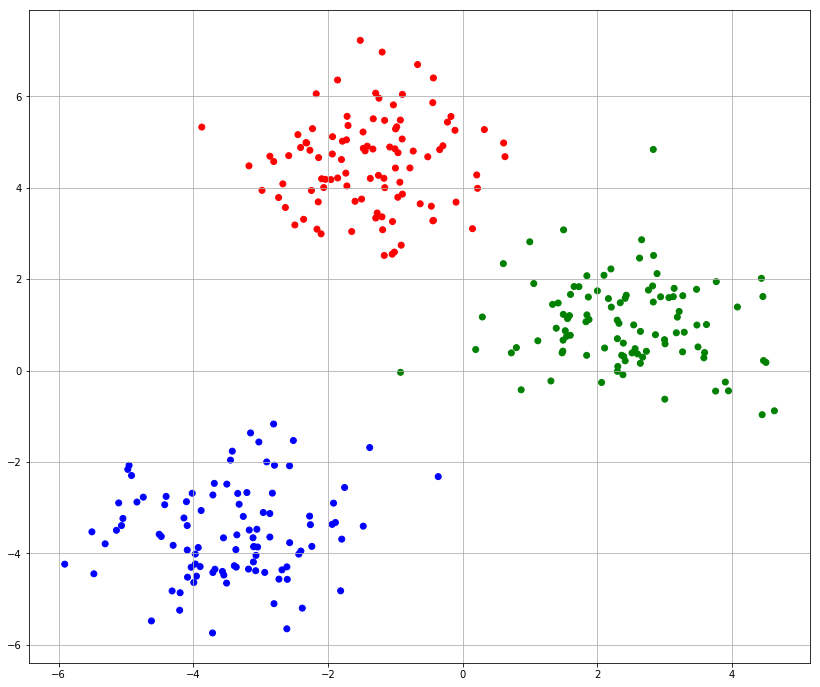

In [3]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(14, 12));
plt.scatter(data[:, 0], data[:, 1], color=[colors[var] for var in target]);
plt.grid(True);

<p>На инициализации алгоритма, $\large{k}$ случайных точек помечаются как центройды класстеров</p>

In [4]:
np.random.seed(42)
centers = data[np.random.choice(np.arange(data.shape[0]), 3, replace=False)]

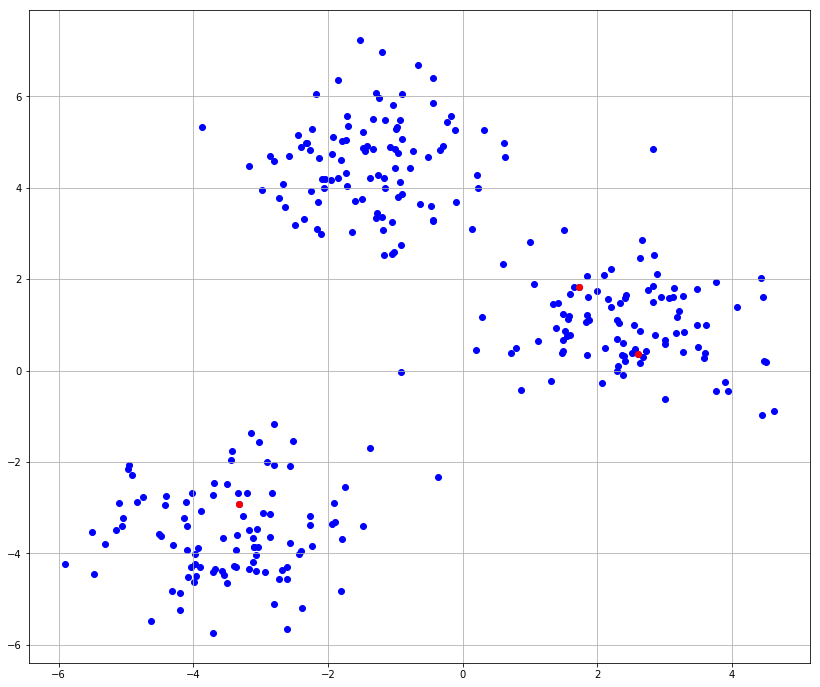

In [5]:
plt.figure(figsize=(14, 12));
plt.scatter(data[:, 0], data[:, 1], c='blue');
plt.scatter(centers[:, 0], centers[:, 1], c='red');
plt.grid(True);

<p>На E шаге алгоритма, мы считаем расстояния от всех точек до центройд и каждой точке ставим в соответствие ближайшую центройду</p>

In [6]:
distances = cdist(data, centers)

In [7]:
closest = np.argmin(distances, axis=1)

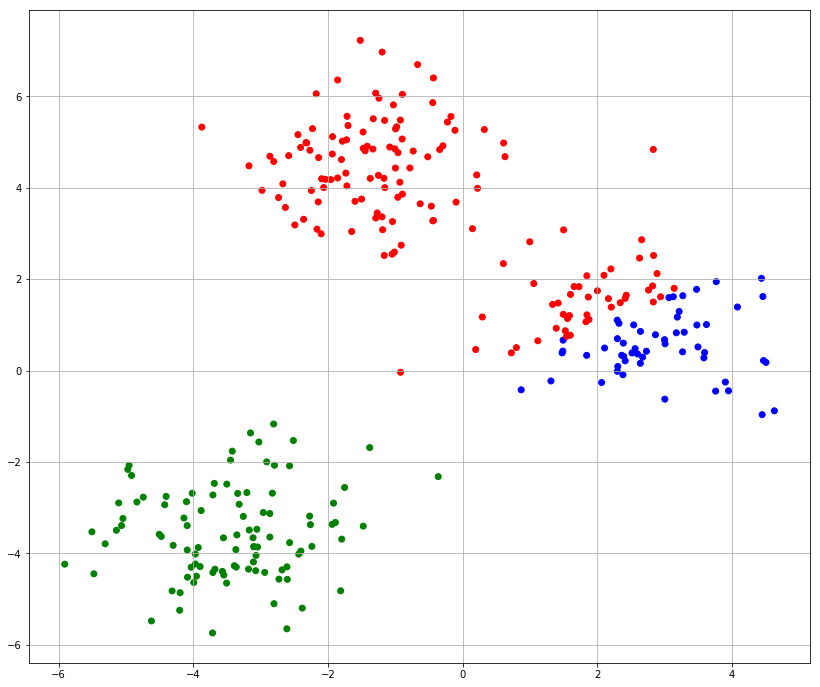

In [8]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(14, 12));
plt.scatter(data[:, 0], data[:, 1], color=[colors[var] for var in closest]);
plt.grid(True);

<p>На M шаге алгоритма, мы пересчитываем центройды класстеров исходя из точек полученных на предыдущем шаге</p>

In [9]:
new_clusters = []
for cluster in np.unique(closest):
    new_clusters.append(data[closest == cluster].mean(axis=0))
new_clusters = np.array(new_clusters)

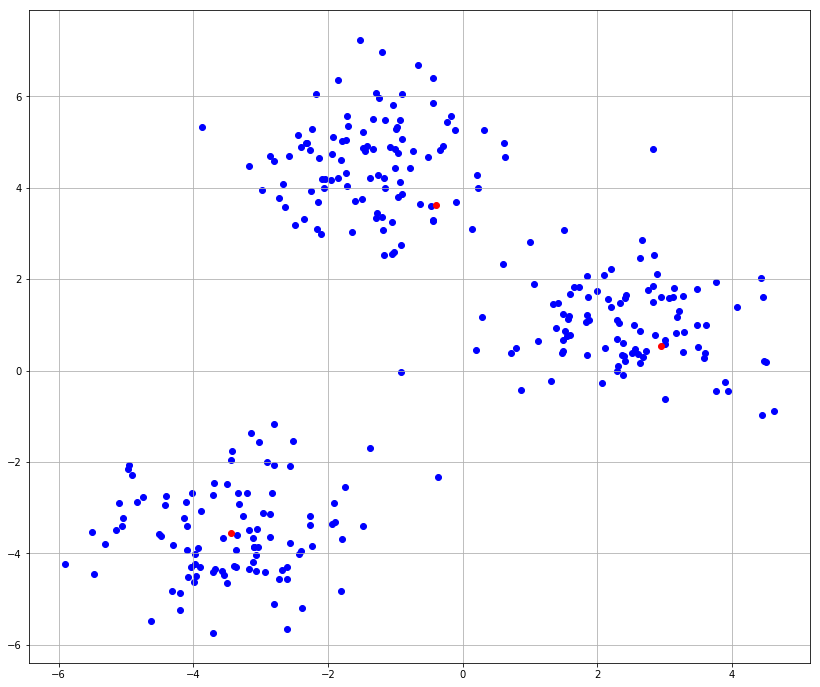

In [10]:
plt.figure(figsize=(14, 12));
plt.scatter(data[:, 0], data[:, 1], c='blue');
plt.scatter(new_clusters[:, 0], new_clusters[:, 1], c='red');
plt.grid(True);

<p>Алгоритм вычисляется до тех пор, пока центройды не зафиксируются, либо их смещение будет очень мало, либо закончится количество итераций</p>

In [11]:
for j in range(10):
    new_clusters = []
    for cluster in np.unique(closest):
        new_clusters.append(data[closest == cluster].mean(axis=0))
    new_clusters = np.array(new_clusters)
    idx = np.argsort(new_clusters[:,0])
    new_clusters = new_clusters[idx]
    distances = cdist(data, new_clusters)
    closest = np.argmin(distances, axis=1)

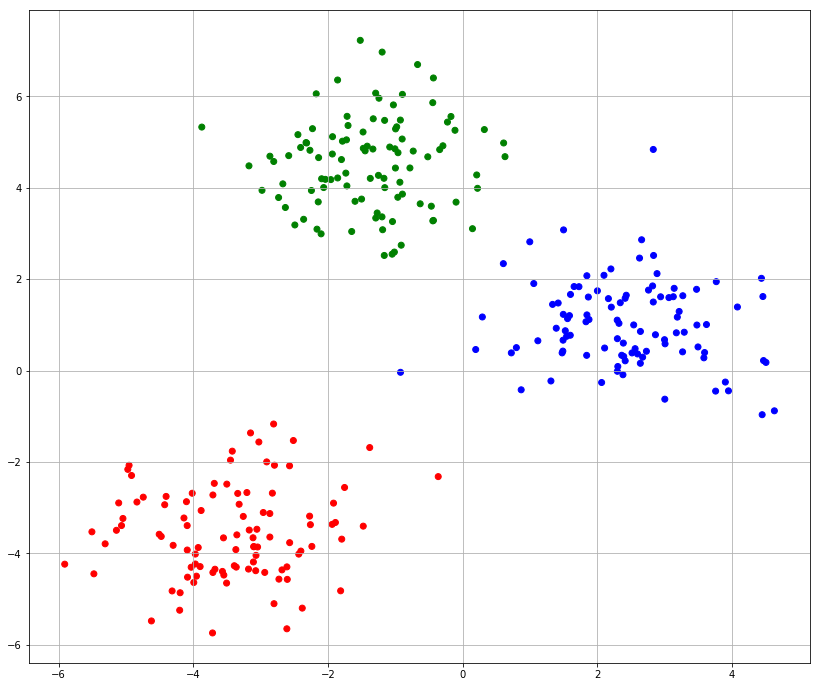

In [12]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(14, 12));
plt.scatter(data[:, 0], data[:, 1], color=[colors[var] for var in closest]);
plt.grid(True);

<p>Алгоритм нестабилен относительно начальных точек инициализации</p>

In [13]:
np.random.seed(1)
centers = data[np.random.choice(np.arange(data.shape[0]), 3, replace=False)]
distances = cdist(data, centers)
closest = np.argmin(distances, axis=1)
for j in range(10):
    new_clusters = []
    for cluster in np.unique(closest):
        new_clusters.append(data[closest == cluster].mean(axis=0))
    new_clusters = np.array(new_clusters)
    idx = np.argsort(new_clusters[:,0])
    new_clusters = new_clusters[idx]
    distances = cdist(data, new_clusters)
    closest = np.argmin(distances, axis=1)

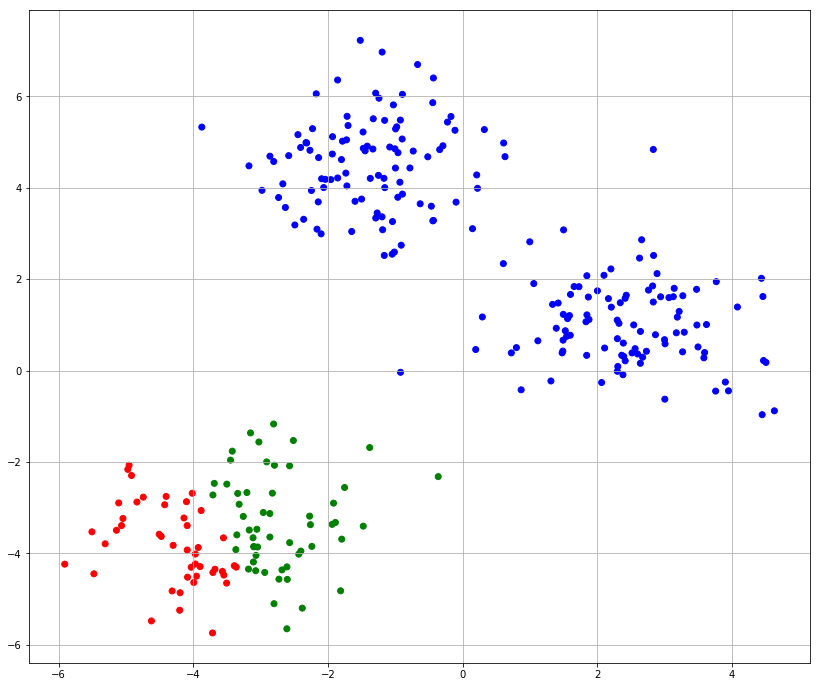

In [14]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(14, 12));
plt.scatter(data[:, 0], data[:, 1], color=[colors[var] for var in closest]);
plt.grid(True);

<p>Чтобы избежать этого, алгоритм запускают несколько раз с различными начальными точками</p>

In [15]:
all_clusters = np.zeros((50, 3, 2))
for i in range(50):
    centers = data[np.random.choice(np.arange(data.shape[0]), 3, replace=False)]
    distances = cdist(data, centers)
    closest = np.argmin(distances, axis=1)
    for j in range(10):
        new_clusters = []
        for cluster in np.unique(closest):
            new_clusters.append(data[closest == cluster].mean(axis=0))
        new_clusters = np.array(new_clusters)
        idx = np.argsort(new_clusters[:,0])
        new_clusters = new_clusters[idx]
        distances = cdist(data, new_clusters)
        closest = np.argmin(distances, axis=1)
    all_clusters[i] = new_clusters

In [16]:
clusters = all_clusters.mean(0)

In [17]:
distances = cdist(data, clusters)
closest = np.argmin(distances, axis=1)

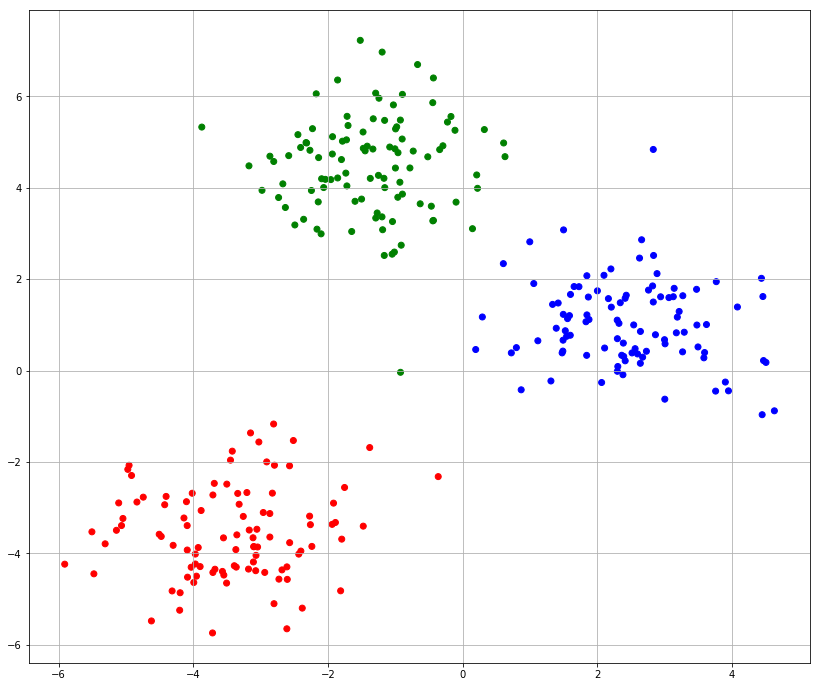

In [18]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(14, 12));
plt.scatter(data[:, 0], data[:, 1], color=[colors[var] for var in closest]);
plt.grid(True);

<p>В sklearn, алгоритм kMeans находится в модуле clusters, класс KMeans</p>

In [19]:
kmeans = KMeans(n_clusters=3)

In [20]:
clusters = kmeans.fit_predict(data)

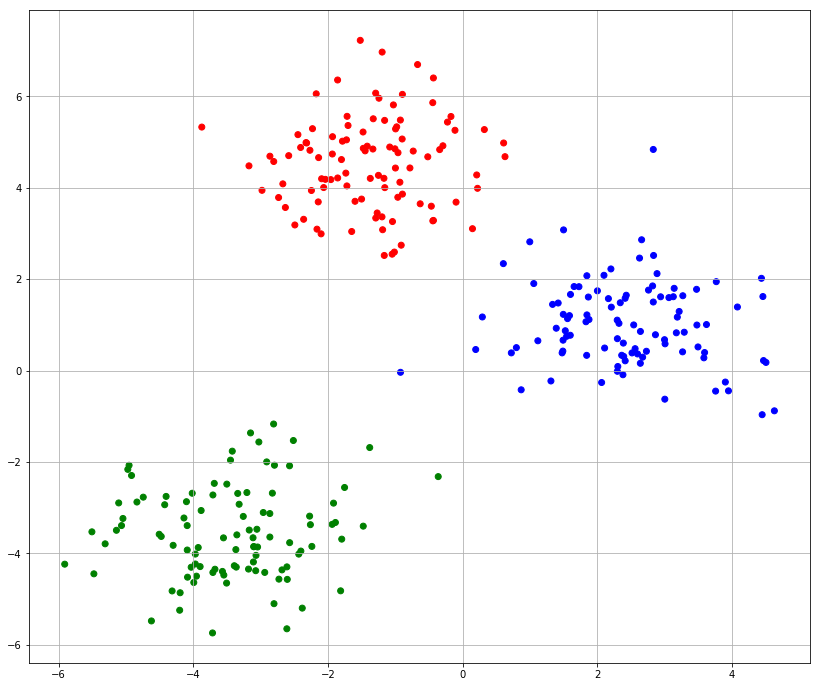

In [21]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(14, 12));
plt.scatter(data[:, 0], data[:, 1], color=[colors[var] for var in clusters]);
plt.grid(True);

<p>Выбор числа кластеров можно делать исходя из метода локтя</p>

In [22]:
inertia = []
for i in range(2, 13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

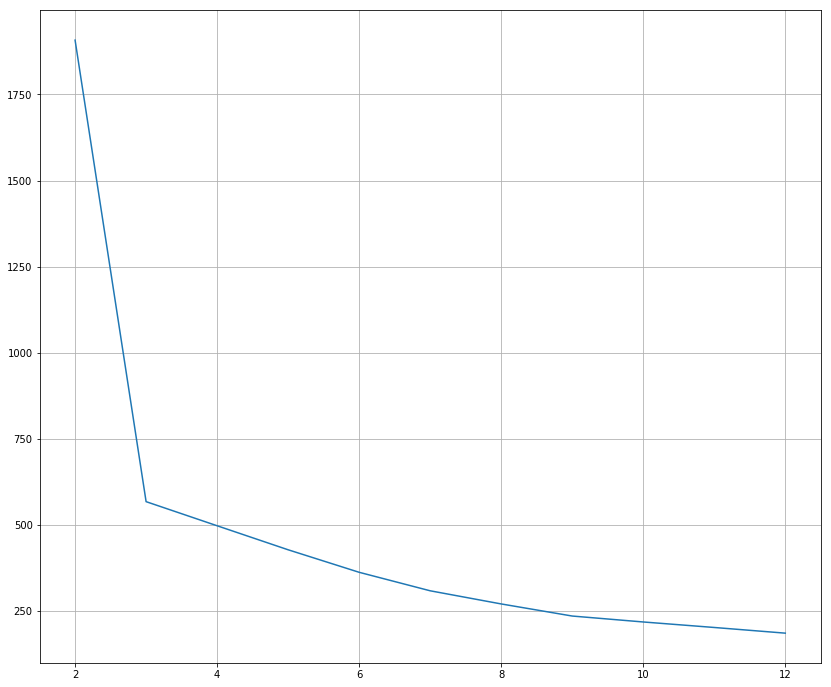

In [24]:
plt.figure(figsize=(14, 12));
plt.plot(np.arange(2, 13), inertia);
plt.grid(True);

# 